Logistic Regression on Multi-Class Problem : Iris Dataset

# 0. Import Packages

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_iris

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [5]:
from scipy.stats import chi2_contingency

# 1. Load Dataset

In [89]:
# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Target variable to the DataFrame
iris_df['target'] = iris.target

# Numerical target values with corresponding class names
iris_df['label'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Shape of The Dataset : ", iris_df.shape)
iris_df.head(3)


Shape of The Dataset :  (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [91]:
iris_df["label"].value_counts()

label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# 3. Split

In [92]:
# Split data into training and testing sets
train, test = train_test_split(iris_df, test_size=0.3, random_state=99)

print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)


Training data shape: (105, 6)
Testing data shape: (45, 6)


# 4. Data Explorartion

In [93]:
train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
10,5.4,3.7,1.5,0.2,0,setosa
25,5.0,3.0,1.6,0.2,0,setosa
13,4.3,3.0,1.1,0.1,0,setosa


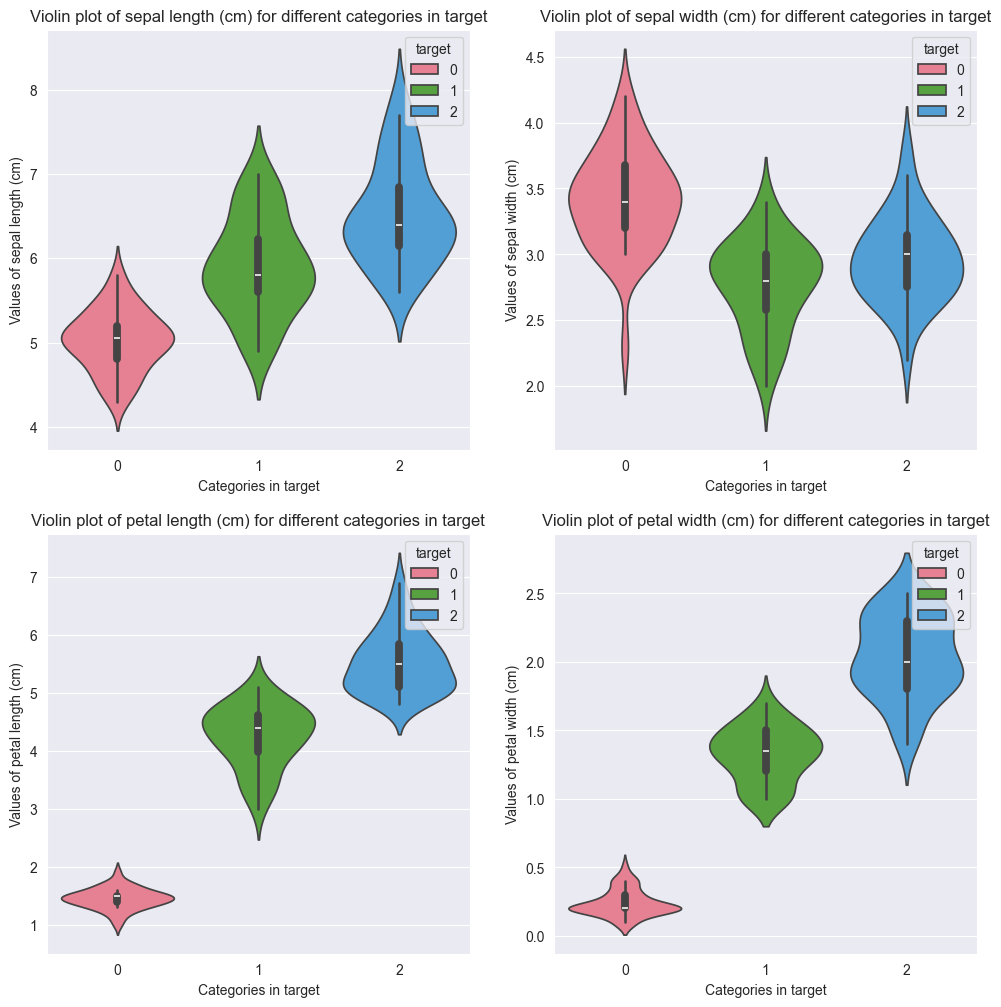

In [94]:
# Set x constant
x_const = 'target'

# Loop through first four columns in X
cols_to_plot = train.columns[:4]
num_cols = len(cols_to_plot)
num_rows = (num_cols + 1) // 2  # Number of rows needed to accommodate subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
palette = sns.color_palette("husl", len(train['target'].unique()))

for i, col in enumerate(cols_to_plot):
    row_index = i // 2
    col_index = i % 2
    # print(row_index, col_index)
    ax = axes[row_index, col_index]
    sns.violinplot(x=x_const, y=col, data=train, ax=ax, hue=x_const, palette=palette, legend=True)
    ax.set_title(f'Violin plot of {col} for different categories in {x_const}')
    ax.set_xlabel(f'Categories in {x_const}')
    ax.set_ylabel(f'Values of {col}')


In [95]:
train['petal_box(cm^2)'] = train['petal length (cm)'] * train['petal width (cm)']
train['sepal_box(cm^2)'] = train['sepal length (cm)'] * train['sepal width (cm)']
train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,petal_box(cm^2),sepal_box(cm^2)
10,5.4,3.7,1.5,0.2,0,setosa,0.30,19.98
25,5.0,3.0,1.6,0.2,0,setosa,0.32,15.00
13,4.3,3.0,1.1,0.1,0,setosa,0.11,12.90


0 0
0 1


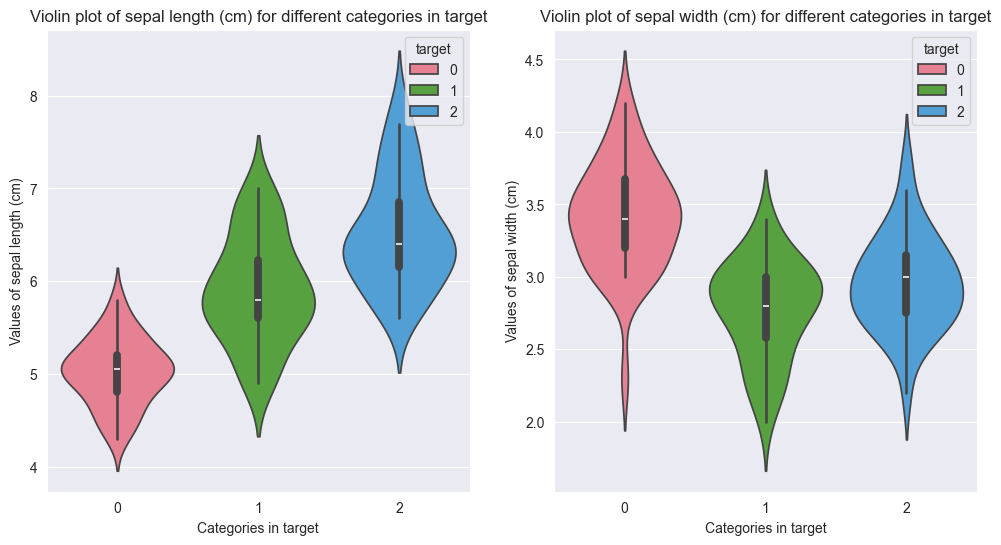

In [96]:
cols_to_plot = train.columns[:2]
num_cols = len(cols_to_plot)
num_rows = (num_cols + 1) // 2  # Number of rows needed to accommodate subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
palette = sns.color_palette("husl", len(train['target'].unique()))
for i, col in enumerate(cols_to_plot):
    row_index = i // 2
    col_index = i % 2
    print(row_index, col_index)
    ax = axes[col_index]
    sns.violinplot(x=x_const, y=col, data=train, ax=ax, hue=x_const, palette=palette, legend=True)
    ax.set_title(f'Violin plot of {col} for different categories in {x_const}')
    ax.set_xlabel(f'Categories in {x_const}')
    ax.set_ylabel(f'Values of {col}')

In [97]:
        
def feature_association(df, target, feature):        
        contingency_table = pd.crosstab(df[target], pd.cut(df[feature], bins=10))
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        print("Cramer's Value : ",cramers_v)

        # Results
        print("Chi-Square Statistic : ", chi2)
        print("P-value : ", p)
        print("Degrees of Freedom : ", dof)
        # print("Expected Frequencies:\n", expected)
        return 0


In [100]:
for feature in train.columns:
    if feature != 'target' and feature != 'label':
        print(feature, ' : ')
        feature_association(train, 'target', feature)
        print('*'*100)


sepal length (cm)  : 
Cramer's Value :  0.6628534551991766
Chi-Square Statistic :  92.26868764459223
P-value :  5.639564642208636e-12
Degrees of Freedom :  18
****************************************************************************************************
sepal width (cm)  : 
Cramer's Value :  0.5067168947927673
Chi-Square Statistic :  53.920022408369114
P-value :  1.8884997032289545e-05
Degrees of Freedom :  18
****************************************************************************************************
petal length (cm)  : 
Cramer's Value :  0.911558797332234
Chi-Square Statistic :  174.49728260869566
P-value :  1.0644815297279373e-28
Degrees of Freedom :  16
****************************************************************************************************
petal width (cm)  : 
Cramer's Value :  0.9509393851795783
Chi-Square Statistic :  189.9
P-value :  8.642686560694406e-32
Degrees of Freedom :  16
************************************************************************

In [101]:
#Sepal Box is Not Required
train.drop(["sepal_box(cm^2)"], axis =1, inplace =True)
test["petal_box(cm^2)"] = test["petal length (cm)"] * test["petal width (cm)"]

train.shape, test.shape

((105, 7), (45, 7))

# 5. Data Scaling

In [102]:
X_train, y_train, X_test, y_test = train.drop(['target', 'label'], axis = 1), train["target"], test.drop(['target','label'], axis=1), test["target"], 

In [103]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Model

In [104]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# 7. Scores

In [105]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, target_names=iris.target_names))

Accuracy: 0.9777777777777777

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.94      0.97        18
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Precision**: 

For the 'setosa' class, precision is 1.00, meaning all instances predicted as 'setosa' are actually 'setosa'.
For the 'versicolor' class, precision is 1.00, indicating all instances predicted as 'versicolor' are indeed 'versicolor'.
For the 'virginica' class, precision is 0.94, suggesting that 94% of instances predicted as 'virginica' are actually 'virginica'.
Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all actual positives. It measures the ability of the model to capture all positive instances. Recall is calculated as:

**Recall**:
 

For the 'setosa' class, recall is 1.00, indicating that the model correctly identifies all 'setosa' instances.
For the 'versicolor' class, recall is 0.94, suggesting that the model captures 94% of 'versicolor' instances.
For the 'virginica' class, recall is 1.00, meaning the model correctly identifies all 'virginica' instances.


**F1-score**: 
 

For the 'setosa' class, the F1-score is 1.00, indicating a perfect balance between precision and recall.
For the 'versicolor' class, the F1-score is 0.97, showing a strong balance between precision and recall.
For the 'virginica' class, the F1-score is also 0.97, indicating a good balance between precision and recall.


**Support**: 


Support is the number of actual occurrences of each class in the specified dataset. It represents the number of samples for each class in the testing set.
There are 12 instances of 'setosa', 18 instances of 'versicolor', and 15 instances of 'virginica' in the testing set.


**Accuracy**: 

The overall accuracy of the model is 0.98, indicating that 98% of instances are correctly classified.

**Macro average**: 

Macro average calculates the average of the metrics (precision, recall, and F1-score) for each class without considering class imbalance. It gives each class equal weight.
The macro-average precision, recall, and F1-score are all 0.98.


**Weighted average**: 


Weighted average calculates the average of the metrics weighted by the support of each class. It gives higher weight to classes with more instances.
The weighted average precision, recall, and F1-score are all 0.98, indicating that they are similar to the macro-average values because the dataset is relatively balanced.

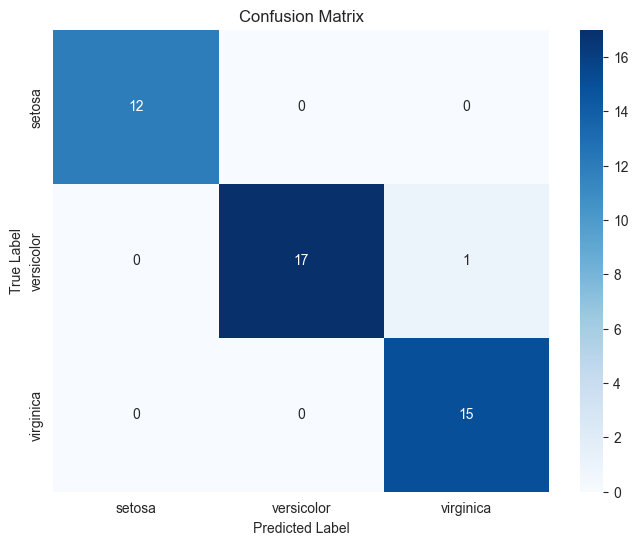

In [106]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

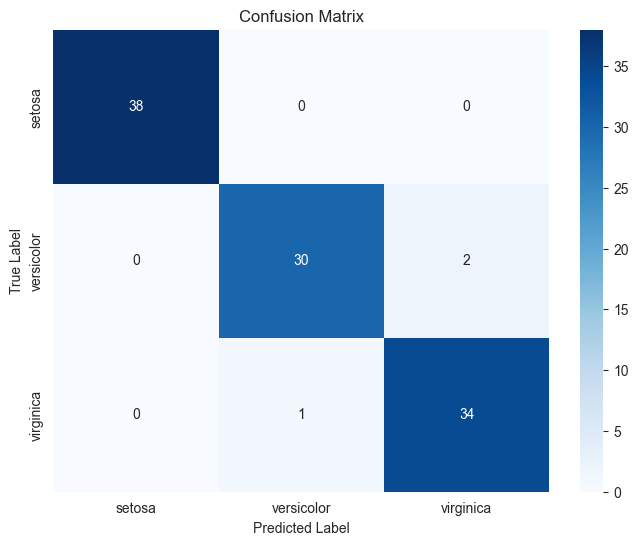

In [107]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [108]:
np.random.seed(99)
pca = PCA(n_components=2, random_state=99)

X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns = ['var1', 'var2'])
X_test_pca = pd.DataFrame(pca.transform(X_test), columns = ['var1', 'var2'])

In [109]:
train["PRED"] = y_pred_train
test["PRED"] = y_pred_test

X_train_result = pd.concat([X_train_pca, train[["target", "PRED"]]], axis=1)
X_test_result = pd.concat([X_test_pca, test[["target", "PRED"]]], axis=1)

X_train_result.head(3)

,var1,var2,target,PRED
0,-2.309582,-1.072306,0.0,0.0
1,-2.155251,0.590655,0.0,0.0
2,-2.771391,0.882258,NaN,NaN


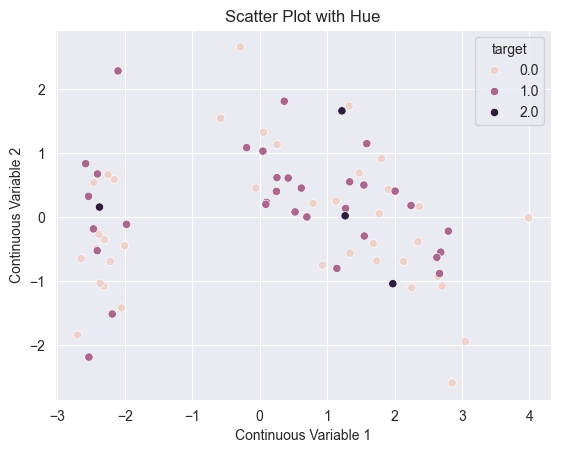

In [110]:
sns.scatterplot(data=X_train_result, x='var1', y='var2', hue='target')

# Add title and labels
plt.title('Scatter Plot with Hue')
plt.xlabel('Continuous Variable 1')
plt.ylabel('Continuous Variable 2')
# Show the plot
plt.show()

In [111]:
coefficients = log_reg.coef_
intercept = log_reg.intercept_


# Print the equation for each class
for i, coef in enumerate(coefficients):
    equation = f"P(y = {i} | X) = exp("
    for j, w in enumerate(coef):
        equation += f"{w} * {train.columns[j]} + "
    equation += f"{intercept[i]})"
    print(f"Class {i}: {equation}")


Class 0: P(y = 0 | X) = exp(-0.7815936420185812 * sepal length (cm) + 1.029489900184154 * sepal width (cm) + -1.4758613618869136 * petal length (cm) + -1.3641964276494043 * petal width (cm) + -1.023676838517641 * target + -0.19778353698314416)
Class 1: P(y = 1 | X) = exp(0.48966050314768345 * sepal length (cm) + -0.2882003362164863 * sepal width (cm) + 0.05475067176813604 * petal length (cm) + -0.030420183647872245 * petal width (cm) + -0.9156092981979739 * target + 1.7897296092175807)
Class 2: P(y = 2 | X) = exp(0.2919331388708975 * sepal length (cm) + -0.741289563967668 * sepal width (cm) + 1.4211106901187776 * petal length (cm) + 1.3946166112972764 * petal width (cm) + 1.9392861367156136 * target + -1.5919460722344339)


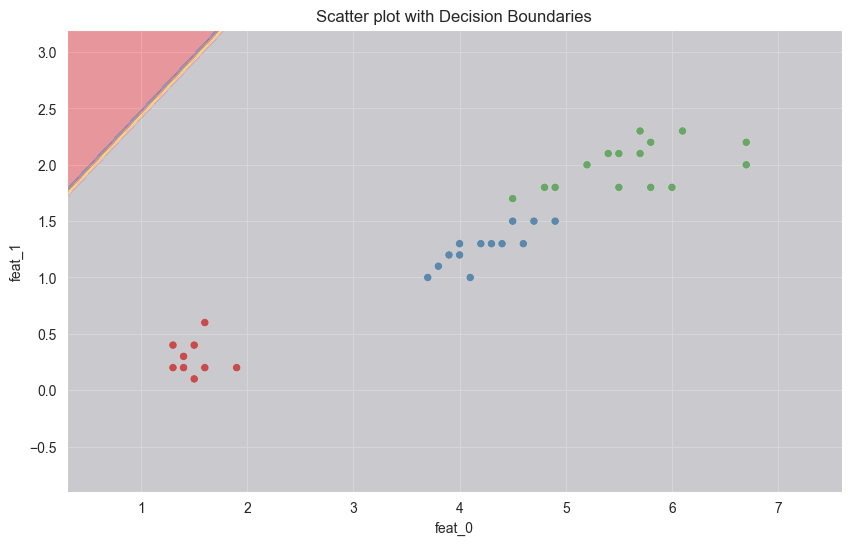

In [112]:
# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))

# Plot actual values
sns.scatterplot(data=test, x='petal length (cm)', y='petal width (cm)', hue='target', palette='Set1', legend=False)

# Plot decision boundaries
x_min, x_max = test['petal length (cm)'].min() - 1, test['petal length (cm)'].max() + 1
y_min, y_max = test['petal width (cm)'].min() - 1, test['petal width (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

mesh_data = np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())]
Z = log_reg.predict(mesh_data)

Z = Z.reshape(xx.shape)

xx = np.nan_to_num(xx)
yy = np.nan_to_num(yy)
Z = np.nan_to_num(Z)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')


plt.xlabel('feat_0')
plt.ylabel('feat_1')
plt.title('Scatter plot with Decision Boundaries')
plt.show()

In [116]:

import unittest
import numpy as np

class TestContourPlot(unittest.TestCase):

    def __init__(self, xx, yy, Z):
        # Initialize test data
        self.xx = xx
        self.yy = yy
        self.Z = Z
    def test_data_types(self):
        # Test if data types are numeric
        self.assertTrue(np.issubdtype(self.xx.dtype, np.number))
        self.assertTrue(np.issubdtype(self.yy.dtype, np.number))
        self.assertTrue(np.issubdtype(self.Z.dtype, np.number))

    def test_nan_values(self):
        # Test if Z contains NaN values after nan_to_num
        nan_count = np.count_nonzero(np.isnan(self.Z))
        self.assertEqual(nan_count, 0, "Z contains NaN values")

    def test_inf_values(self):
        # Test if Z contains infinite values
        inf_count = np.count_nonzero(np.isinf(self.Z))
        self.assertEqual(inf_count, 0, "Z contains infinite values")

    def test_data_range(self):
        # Test if data ranges are appropriate
        self.assertTrue(np.min(self.xx) < np.max(self.xx))
        self.assertTrue(np.min(self.yy) < np.max(self.yy))

In [114]:
Z

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [72]:
type(Z)

numpy.ndarray